In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read in the data frame.

In [301]:
Empl_reten = pd.read_csv("employee_retention_data.csv")
Empl_reten.head(5)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


The next couple commands are to create new variables for duration: durtaion of employees still working (up to '2015-12-13') and duration of employees who quit.

In [302]:
Empl_reten['still_working'] = np.where(pd.isnull(Empl_reten['quit_date']), ['2015-12-13'], np.nan)

In [303]:
Empl_reten['join_date']= pd.to_datetime(Empl_reten['join_date'])
Empl_reten['quit_date']= pd.to_datetime(Empl_reten['quit_date'])
Empl_reten['still_working']= pd.to_datetime(Empl_reten['still_working'])

In [304]:
Empl_reten.head(5)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,still_working
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,NaT
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,NaT
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,2015-12-13
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,NaT
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,NaT


Compute the duration of employment for employees who quit. Add this varibale as a new column to the existing dataframe.

In [305]:
Empl_reten['empl_quit_duration'] = (Empl_reten['quit_date'] - Empl_reten['join_date'])

Compute the duration of employment for employees who are still working (up to '2015-12-13'). Add this varibale as a new column to the existing dataframe.

In [306]:
Empl_reten['still_working_duration'] = (Empl_reten['still_working'] - Empl_reten['join_date'])

In [307]:
Empl_reten.head(5)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,still_working,empl_quit_duration,still_working_duration
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,NaT,585 days,NaT
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,NaT,340 days,NaT
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,2015-12-13,NaT,426 days
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,NaT,389 days,NaT
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,NaT,1040 days,NaT


Exploratory data analysis. Look at the distribution of seniority.

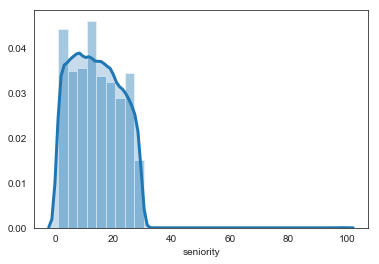

In [308]:
import seaborn as sns

sns.distplot(Empl_reten['seniority'], hist = True, kde = True, bins = 30,
             kde_kws = {'shade': True, 'linewidth': 3})

In [309]:
Empl_reten['seniority'].describe()

count    24702.000000
mean        14.127803
std          8.089520
min          1.000000
25%          7.000000
50%         14.000000
75%         21.000000
max         99.000000
Name: seniority, dtype: float64

There appear to be some outliers - possibly data entry mistakes. It is highly unlikely that someone worked for 99 years prior to their new employment. Let's remove the outliers after calculating z-scores.

There are some outliers in this dataset - as it is highly unlikely someone worked for 99 years before getting hired for their current position.
Need to get rid of the outliers.

In [310]:
from scipy import stats

z = np.abs(stats.zscore(Empl_reten['seniority']))
Empl_reten['seniority_z_score'] = z
Empl_reten = Empl_reten[Empl_reten['seniority_z_score'] < 4]

Seniority plot without outliers.

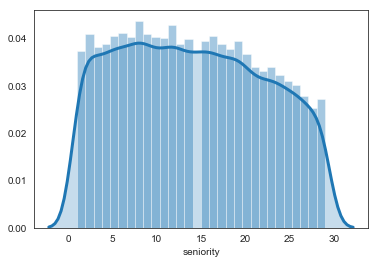

In [311]:
sns.distplot(Empl_reten['seniority'], hist = True, kde = True, bins = 30,
             kde_kws = {'shade': True, 'linewidth': 3})

Try removing rows with NaN values for employess who quit. Create a new data frame.

In [312]:
empl_quit = Empl_reten.copy()

In [313]:
empl_quit.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,still_working,empl_quit_duration,still_working_duration,seniority_z_score
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,NaT,585 days,NaT,1.714870
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,NaT,340 days,NaT,0.725916
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,2015-12-13,NaT,426 days,0.015799
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,NaT,389 days,NaT,0.725916
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,NaT,1040 days,NaT,1.096774


In [314]:
empl_quit = empl_quit.drop(labels = ['still_working', 'still_working_duration'], axis = 1)

In [315]:
empl_quit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24700 entries, 0 to 24699
Data columns (total 9 columns):
employee_id           24700 non-null float64
company_id            24700 non-null int64
dept                  24700 non-null object
seniority             24700 non-null int64
salary                24700 non-null float64
join_date             24700 non-null datetime64[ns]
quit_date             13508 non-null datetime64[ns]
empl_quit_duration    13508 non-null timedelta64[ns]
seniority_z_score     24700 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(2), object(1), timedelta64[ns](1)
memory usage: 1.9+ MB


In [316]:
empl_quit_no_na = empl_quit.dropna()

In [317]:
empl_quit_no_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13508 entries, 0 to 24699
Data columns (total 9 columns):
employee_id           13508 non-null float64
company_id            13508 non-null int64
dept                  13508 non-null object
seniority             13508 non-null int64
salary                13508 non-null float64
join_date             13508 non-null datetime64[ns]
quit_date             13508 non-null datetime64[ns]
empl_quit_duration    13508 non-null timedelta64[ns]
seniority_z_score     13508 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(2), object(1), timedelta64[ns](1)
memory usage: 1.0+ MB


In [325]:
empl_quit_no_na['empl_quit_days'] = empl_quit_no_na['empl_quit_duration'].astype('timedelta64[D]')
empl_quit_no_na['empl_quit_days'] = empl_quit_no_na['empl_quit_days'].astype(int)

/Users/Georgiy/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Georgiy/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


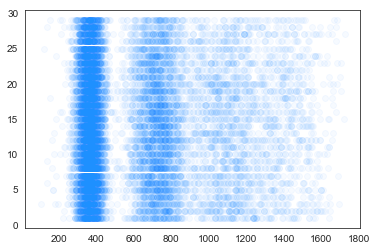

In [326]:
plt.scatter(empl_quit_no_na['empl_quit_days'], empl_quit_no_na['seniority'],
            color = 'dodgerblue', alpha = 0.04)
plt.show() # Depending on whether you use IPython or interactive mode, etc.

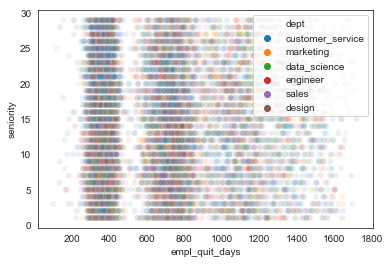

In [327]:
sns.scatterplot(empl_quit_no_na['empl_quit_days'],
                empl_quit_no_na['seniority'], hue = empl_quit_no_na['dept'], alpha = 0.1)

/Users/Georgiy/anaconda3/envs/insight/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


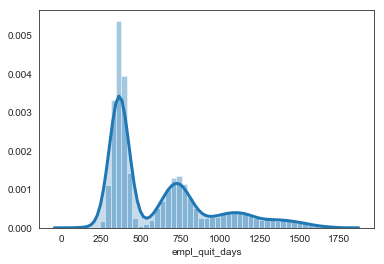

In [156]:
sns.distplot(empl_quit_no_na['empl_quit_days'], hist = True, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3})

It seems like there are three groups - maybe four. One group tends to leave after about a year (~375 days), a second group leaves after about 2 years (750 days), and a third group works for roughly 3 years (maybe ~1100 days). Then there is a fourth group that leaves maybe after 4 years or so (~1400 days).

Try removing rows with NaN values for employess who didn't quit. Create a new data frame.

In [328]:
empl_still_working = Empl_reten.copy()

In [329]:
empl_still_working = empl_still_working.drop(labels = ['quit_date', 'empl_quit_duration', 'empl_quit_days'], axis = 1)

In [330]:
empl_still_working.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24700 entries, 0 to 24699
Data columns (total 9 columns):
employee_id               24700 non-null float64
company_id                24700 non-null int64
dept                      24700 non-null object
seniority                 24700 non-null int64
salary                    24700 non-null float64
join_date                 24700 non-null datetime64[ns]
still_working             11192 non-null datetime64[ns]
still_working_duration    11192 non-null timedelta64[ns]
seniority_z_score         24700 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(2), object(1), timedelta64[ns](1)
memory usage: 1.9+ MB


In [331]:
empl_still_working_no_na = empl_still_working.dropna()

In [332]:
empl_still_working_no_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11192 entries, 2 to 24698
Data columns (total 9 columns):
employee_id               11192 non-null float64
company_id                11192 non-null int64
dept                      11192 non-null object
seniority                 11192 non-null int64
salary                    11192 non-null float64
join_date                 11192 non-null datetime64[ns]
still_working             11192 non-null datetime64[ns]
still_working_duration    11192 non-null timedelta64[ns]
seniority_z_score         11192 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(2), object(1), timedelta64[ns](1)
memory usage: 874.4+ KB


In [333]:
empl_still_working_no_na['empl_still_working_days'] = empl_still_working_no_na['still_working_duration'].astype('timedelta64[D]')

/Users/Georgiy/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [334]:
empl_still_working_no_na['empl_still_working_days'] = empl_still_working_no_na['empl_still_working_days'].astype(int)

/Users/Georgiy/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [335]:
empl_still_working_no_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11192 entries, 2 to 24698
Data columns (total 10 columns):
employee_id                11192 non-null float64
company_id                 11192 non-null int64
dept                       11192 non-null object
seniority                  11192 non-null int64
salary                     11192 non-null float64
join_date                  11192 non-null datetime64[ns]
still_working              11192 non-null datetime64[ns]
still_working_duration     11192 non-null timedelta64[ns]
seniority_z_score          11192 non-null float64
empl_still_working_days    11192 non-null int64
dtypes: datetime64[ns](2), float64(3), int64(3), object(1), timedelta64[ns](1)
memory usage: 961.8+ KB


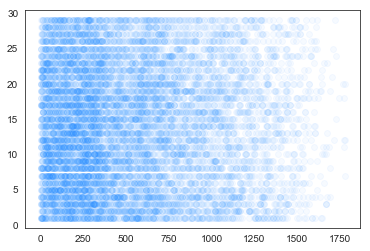

In [336]:
plt.scatter(empl_still_working_no_na['empl_still_working_days'], empl_still_working_no_na['seniority'],
            color = 'dodgerblue', alpha = 0.04)
plt.show() # Depending on whether you use IPython or interactive mode, etc.

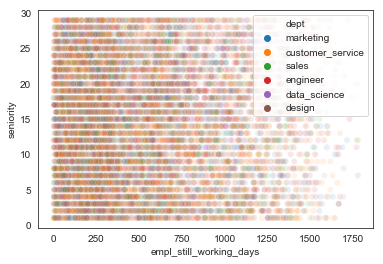

In [337]:
sns.scatterplot(empl_still_working_no_na['empl_still_working_days'],
                empl_still_working_no_na['seniority'], hue = empl_still_working_no_na['dept'], alpha = 0.1)

/Users/Georgiy/anaconda3/envs/insight/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


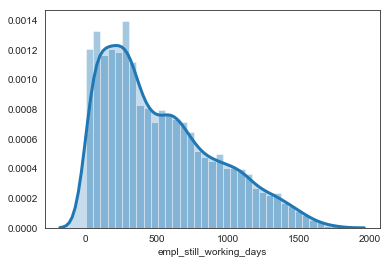

In [338]:
sns.distplot(empl_still_working_no_na['empl_still_working_days'], hist = True, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3})

Look at the number of employees withing each department (customer_service, engineering, etc.)

In [339]:
Empl_reten['dept'].value_counts()

customer_service    9180
engineer            4612
data_science        3190
sales               3172
marketing           3166
design              1380
Name: dept, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

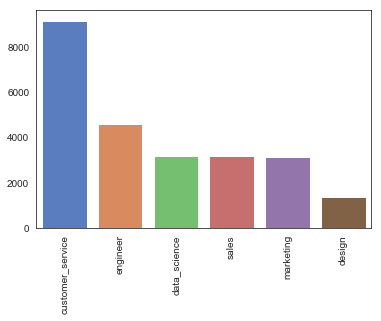

In [340]:
sns.set_style("white")
sns.barplot(x = Empl_reten['dept'].value_counts().index,
            y = Empl_reten['dept'].value_counts().values,
            palette='muted', errcolor='dimgray')

plt.xticks(rotation=90) # rotates the labesl on the x-axis.

Sanity check: see if there are any missing values (NaN) in the data frame that includes employees who're still working.

In [341]:
empl_still_working_no_na.isna().sum()

employee_id                0
company_id                 0
dept                       0
seniority                  0
salary                     0
join_date                  0
still_working              0
still_working_duration     0
seniority_z_score          0
empl_still_working_days    0
dtype: int64

Sanity check: see if there are any missing values (NaN) in the data frame that includes employees who quit.

In [161]:
empl_quit_no_na.isna().sum()

employee_id           0
company_id            0
dept                  0
seniority             0
salary                0
join_date             0
quit_date             0
empl_quit_duration    0
seniority_z_score     0
empl_quit_days        0
dtype: int64

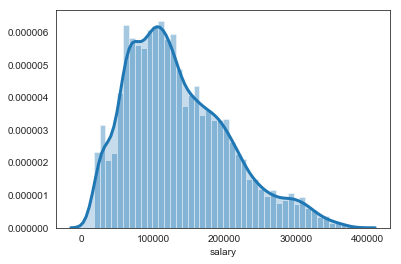

In [342]:
sns.distplot(Empl_reten_no_na_no_out['salary'], hist = True, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3})

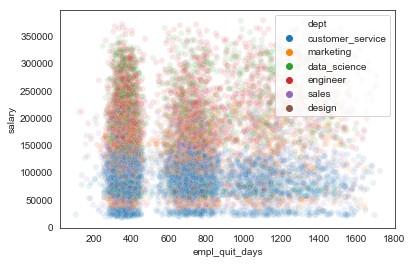

In [343]:
sns.scatterplot(empl_quit_no_na['empl_quit_days'],
                empl_quit_no_na['salary'], hue = empl_quit_no_na['dept'], alpha = 0.1)


It looks like the average salary may stay to be about the same regardless of how long you've worked at a company.
Break down the employment duration in categories, and see if the means for the categories are different.

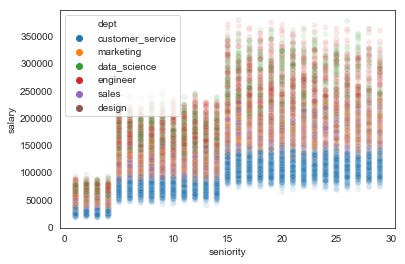

In [344]:
sns.scatterplot(empl_quit_no_na['seniority'],
                empl_quit_no_na['salary'], hue = empl_quit_no_na['dept'], alpha = 0.1)

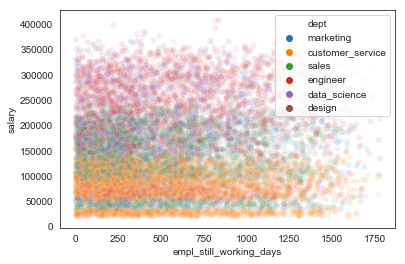

In [345]:
sns.scatterplot(empl_still_working_no_na['empl_still_working_days'],
                empl_still_working_no_na['salary'], hue = empl_still_working_no_na['dept'], alpha = 0.1)


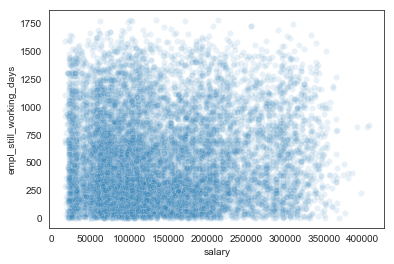

In [346]:
sns.scatterplot(empl_still_working_no_na['salary'],
                empl_still_working_no_na['empl_still_working_days'], alpha = 0.1)

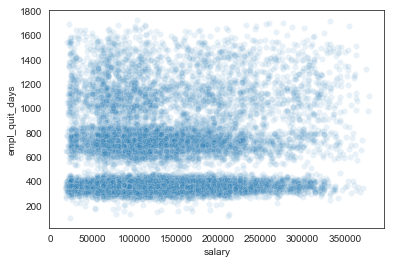

In [347]:
sns.scatterplot(empl_quit_no_na['salary'],
                empl_quit_no_na['empl_quit_days'], alpha = 0.1)


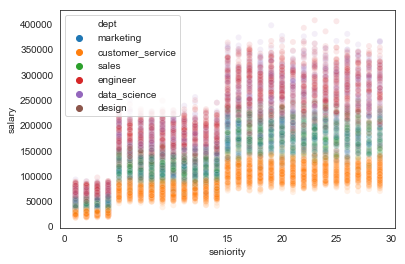

In [348]:
sns.scatterplot(empl_still_working_no_na['seniority'],
                empl_still_working_no_na['salary'], hue = empl_still_working_no_na['dept'], alpha = 0.1)

Let's look at any linear relationships between salary and duration of employment. Do salary increases increase employment duration?

In [349]:
empl_quit_SLR_df = empl_quit_no_na[['salary', 'empl_quit_days']]

In [350]:
X = empl_quit_SLR_df['salary']
y = empl_quit_SLR_df['empl_quit_days']

X = X.values
y = y.values

In [351]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [352]:
from sklearn.linear_model import LinearRegression
Model_1 = LinearRegression()
Model_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [353]:
y_pred_1 = Model_1.predict(X_test)

In [354]:
from sklearn.metrics import r2_score

In [355]:
r2 = r2_score(y_test, y_pred_1)
r2

0.006936262289984452

In [356]:
empl_still_working_SLR_df = empl_still_working_no_na[['salary', 'empl_still_working_days']]

In [357]:
X_2 = empl_still_working_SLR_df['salary']
y_2 = empl_still_working_SLR_df['empl_still_working_days']

X_2 = X_2.values
y_2 = y_2.values

In [358]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.2, random_state=0)

X_2_train = X_2_train.reshape(-1, 1)
X_2_test = X_2_test.reshape(-1, 1)

In [359]:
Model_2 = LinearRegression()
Model_2.fit(X_2_train, y_2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [360]:
y_pred_2 = Model_2.predict(X_2_test)

In [361]:
r2_2 = r2_score(y_2_test, y_pred_2)
r2_2

0.001342894018013463

Need to normalize response variables - that could explain poor model fit.

In [362]:
empl_quit_no_na['log_salary'] = empl_quit_no_na['salary'].apply(np.log)

/Users/Georgiy/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [363]:
empl_still_working_no_na['log_salary'] = empl_still_working_no_na['salary'].apply(np.log)

/Users/Georgiy/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/Users/Georgiy/anaconda3/envs/insight/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


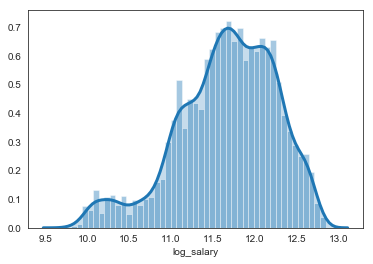

In [364]:
sns.distplot(empl_quit_no_na['log_salary'], hist = True, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3})

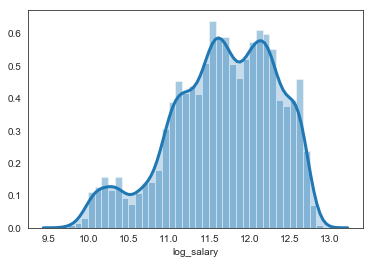

In [365]:
sns.distplot(empl_still_working_no_na['log_salary'], hist = True, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3})

In [366]:
Empl_reten.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24700 entries, 0 to 24699
Data columns (total 12 columns):
employee_id               24700 non-null float64
company_id                24700 non-null int64
dept                      24700 non-null object
seniority                 24700 non-null int64
salary                    24700 non-null float64
join_date                 24700 non-null datetime64[ns]
quit_date                 13508 non-null datetime64[ns]
still_working             11192 non-null datetime64[ns]
empl_quit_duration        13508 non-null timedelta64[ns]
still_working_duration    11192 non-null timedelta64[ns]
seniority_z_score         24700 non-null float64
empl_quit_days            13508 non-null float64
dtypes: datetime64[ns](3), float64(4), int64(2), object(1), timedelta64[ns](2)
memory usage: 2.4+ MB


In [367]:
Empl_reten['empl_still_working_days'] = Empl_reten['still_working_duration'].astype('timedelta64[D]')

In [368]:
Empl_reten['empl_still_working_days'] = Empl_reten['empl_still_working_days'].fillna(value = False)

In [369]:
Empl_reten.head(10)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,still_working,empl_quit_duration,still_working_duration,seniority_z_score,empl_quit_days,empl_still_working_days
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,NaT,585 days,NaT,1.714870,585.0,False
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,NaT,340 days,NaT,0.725916,340.0,False
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,2015-12-13,NaT,426 days,0.015799,NaN,426
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,NaT,389 days,NaT,0.725916,389.0,False
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,NaT,1040 days,NaT,1.096774,1040.0,False
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,NaT,578 days,NaT,0.015799,578.0,False
6,88600.0,4,customer_service,21,107000.0,2013-10-21,NaT,2015-12-13,NaT,783 days,0.849536,NaN,783
7,716309.0,2,customer_service,4,30000.0,2014-03-05,NaT,2015-12-13,NaT,648 days,1.251991,NaN,648
8,172999.0,9,engineer,7,160000.0,2012-12-10,2015-10-23,NaT,1047 days,NaT,0.881134,1047.0,False
9,504159.0,1,sales,7,104000.0,2012-06-12,NaT,2015-12-13,NaT,1279 days,0.881134,NaN,1279


In [370]:
Empl_reten['quit_date'] = Empl_reten['quit_date'].fillna(value = False)

In [371]:
Empl_reten['still_working'] = Empl_reten['still_working'].fillna(value = False)

In [372]:
Empl_reten['empl_quit_duration'] = Empl_reten['empl_quit_duration'].fillna(value = False)

In [373]:
Empl_reten['still_working_duration'] = Empl_reten['still_working_duration'].fillna(value = False)

In [374]:
Empl_reten['empl_quit_days'] = Empl_reten['empl_quit_days'].fillna(value = False)

In [375]:
Empl_reten.head(10)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,still_working,empl_quit_duration,still_working_duration,seniority_z_score,empl_quit_days,empl_still_working_days
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30 00:00:00,False,585 days 00:00:00,False,1.714870,585,False
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04 00:00:00,False,340 days 00:00:00,False,0.725916,340,False
2,927315.0,4,marketing,14,101000.0,2014-10-13,False,2015-12-13 00:00:00,False,426 days 00:00:00,0.015799,False,426
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07 00:00:00,False,389 days 00:00:00,False,0.725916,389,False
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22 00:00:00,False,1040 days 00:00:00,False,1.096774,1040,False
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30 00:00:00,False,578 days 00:00:00,False,0.015799,578,False
6,88600.0,4,customer_service,21,107000.0,2013-10-21,False,2015-12-13 00:00:00,False,783 days 00:00:00,0.849536,False,783
7,716309.0,2,customer_service,4,30000.0,2014-03-05,False,2015-12-13 00:00:00,False,648 days 00:00:00,1.251991,False,648
8,172999.0,9,engineer,7,160000.0,2012-12-10,2015-10-23 00:00:00,False,1047 days 00:00:00,False,0.881134,1047,False
9,504159.0,1,sales,7,104000.0,2012-06-12,False,2015-12-13 00:00:00,False,1279 days 00:00:00,0.881134,False,1279


In [376]:
Empl_reten = Empl_reten.drop(labels = ['empl_quit_duration', 'still_working_duration'], axis = 1)

In [377]:
Empl_reten.head(10)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,still_working,seniority_z_score,empl_quit_days,empl_still_working_days
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30 00:00:00,False,1.714870,585,False
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04 00:00:00,False,0.725916,340,False
2,927315.0,4,marketing,14,101000.0,2014-10-13,False,2015-12-13 00:00:00,0.015799,False,426
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07 00:00:00,False,0.725916,389,False
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22 00:00:00,False,1.096774,1040,False
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30 00:00:00,False,0.015799,578,False
6,88600.0,4,customer_service,21,107000.0,2013-10-21,False,2015-12-13 00:00:00,0.849536,False,783
7,716309.0,2,customer_service,4,30000.0,2014-03-05,False,2015-12-13 00:00:00,1.251991,False,648
8,172999.0,9,engineer,7,160000.0,2012-12-10,2015-10-23 00:00:00,False,0.881134,1047,False
9,504159.0,1,sales,7,104000.0,2012-06-12,False,2015-12-13 00:00:00,0.881134,False,1279


In [378]:
Empl_reten['Class_quit'] = Empl_reten['empl_still_working_days'] == False

In [379]:
Empl_reten['Class_quit'] = Empl_reten['Class_quit'].astype(int)

Create dummy variables for different departments

In [380]:
Empl_reten = pd.get_dummies(Empl_reten, prefix = ['dept_dummy'], columns = ['dept'], drop_first = True)

In [381]:
Empl_reten.head()

,employee_id,company_id,seniority,salary,join_date,quit_date,still_working,seniority_z_score,empl_quit_days,empl_still_working_days,Class_quit,dept_dummy_data_science,dept_dummy_design,dept_dummy_engineer,dept_dummy_marketing,dept_dummy_sales
0,13021.0,7,28,89000.0,2014-03-24,2015-10-30 00:00:00,False,1.714870,585,False,1,0,0,0,0,0
1,825355.0,7,20,183000.0,2013-04-29,2014-04-04 00:00:00,False,0.725916,340,False,1,0,0,0,1,0
2,927315.0,4,14,101000.0,2014-10-13,False,2015-12-13 00:00:00,0.015799,False,426,0,0,0,0,1,0
3,662910.0,7,20,115000.0,2012-05-14,2013-06-07 00:00:00,False,0.725916,389,False,1,0,0,0,0,0
4,256971.0,2,23,276000.0,2011-10-17,2014-08-22 00:00:00,False,1.096774,1040,False,1,1,0,0,0,0


In [391]:
X_rf = Empl_reten[['seniority', 'salary', 'company_id', 'dept_dummy_data_science', 'dept_dummy_design',
                  'dept_dummy_engineer', 'dept_dummy_marketing', 'dept_dummy_sales']]
y_rf = Empl_reten['Class_quit']

In [392]:
from sklearn.ensemble import RandomForestClassifier

In [393]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

In [394]:
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=0)

In [395]:
rf.fit(X_rf_train, y_rf_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [396]:
predictions_rf = rf.predict(X_rf_test)

In [397]:
errors = abs(predictions_rf - y_rf_test)

In [398]:
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.5


In [399]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_rf_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -inf %.


In [400]:
empl_quit_no_na.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,empl_quit_duration,seniority_z_score,empl_quit_days,log_salary
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585 days,1.714870,585,11.396392
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340 days,0.725916,340,12.117241
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389 days,0.725916,389,11.652687
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040 days,1.096774,1040,12.528156
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,578 days,0.015799,578,12.013701


In [401]:
empl_quit_no_na = pd.get_dummies(empl_quit_no_na, prefix = ['dummy'], columns = ['dept'], drop_first = True)

In [420]:
empl_quit_no_na = pd.get_dummies(empl_quit_no_na, prefix = ['dummy'], columns = ['company_id'], drop_first = True)

In [403]:
from sklearn.ensemble import RandomForestRegressor

In [405]:
rf_1 = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [423]:
X_rf_1 = empl_quit_no_na[['seniority', 'salary', 'dummy_2', 'dummy_3', 'dummy_4', 'dummy_5',
                         'dummy_6', 'dummy_7', 'dummy_8', 'dummy_9', 'dummy_10', 'dummy_11', 'dummy_12']]
y_rf_1 = empl_quit_no_na['empl_quit_days']

In [424]:
X_rf_1_train, X_rf_1_test, y_rf_1_train, y_rf_1_test = train_test_split(X_rf_1, y_rf_1, test_size=0.2, random_state=0)

In [425]:
rf_1.fit(X_rf_1_train, y_rf_1_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [426]:
predictions_rf_1 = rf_1.predict(X_rf_1_test)

In [427]:
r_sq = rf_1.score(X_rf_1_test, y_rf_1_test)

In [428]:
r_sq

-0.21540098526269236